# Deep Learning with Python - 3.2
## Multiclass Classification - Reuters Dataset

### Reading the Data

In [1]:
from tensorflow import keras

In [2]:
from tensorflow.keras.datasets import reuters

In [3]:
# Setting up `numpy` to read in pickle files
import numpy as np

# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

# restore np.load for future normal usage
np.load = np_load_old

### Data Preprocessing

In [6]:
# How many training examples do we have?
print("Number of training examples =\t", len(train_data))

# Howe many test examples do we have?
print("Number of test examples =\t", len(test_data))

Number of training examples =	 8982
Number of test examples =	 2246


In [7]:
# Each review is an array of integers, with each integer encoding one of 10_000 commonly ocurring words
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [17]:
# Vectorizing the sequence of words using one-hot encoding
def vectorize_sequences(sequences, dimensions=10000):
    results = np.zeros((len(sequences), dimensions))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Have to either cast the multiclass labels to integer tensor
# Alternatively, we can also use one-hot encoding for the labels
def to_one_hot(labels, dimensions=46):
    results = np.zeros((len(labels), dimensions))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

In [19]:
# Vectorizing data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# One-Hot Encoding the labels
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [30]:
# Also possible to convert labels to categorical data using built-in keras functions
from tensorflow.keras.utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [41]:
# Extracting validation data from the training data
x_val = x_train[:1000]
y_val = y_train[:1000]

partial_x_train = x_train[1000:]
partial_y_train = y_train[1000:]

## Building a Network
Because each sample can be classified into one of 46 different classes, using only 16 units per hidden layer will not provide us with a rich enough hypothesis space to learn the complicated non-linear transformation required to map to one of these 46 classes.

So we will use 64 hidden units per class instead. Hidden units are usually incremented in powers of 2: 8, 16, 32, 64, 128, and so on.

Using fewer than 64 units would create an **information bottleneck** - layers earlier in the network lose out on important information because they do not possess enough hidden units and thus do not have a rich enough hypothesis space to learn the required mapping from a 10k dimensional vector to one of 46 classes.

This means layers added later in the network also miss out on this information, and the entire network's performance is **bottlenecked** by the lack of sufficient nonlinearity earlier on in the network

In [39]:
from tensorflow.keras import models, layers
model = models.Sequential()
model.add(layers.Dense(activation='relu', input_shape=(10000,), units=64))
model.add(layers.Dense(activation='relu', units=64))

# In the output layer, there will be one hidden unit for each possible output class
# The sum of probabilities of all units in the softmax layer will be 1
model.add(layers.Dense(activation='softmax', units=46))

Instructions for updating:
Colocations handled automatically by placer.


In [40]:
# Compile the model
model.compile(optimizer='rmsprop', 
             loss='categorical_crossentropy', 
             metrics=['accuracy'])

### Training the Model

In [42]:
history = model.fit(x=partial_x_train,
                   y=partial_y_train,
                   batch_size=512,
                   epochs=20,
                   validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
7982/7982 [==============================] - 3s 336us/sample - loss: 2.5979 - acc: 0.4832 - val_loss: 1.6867 - val_acc: 0.6570
Epoch 2/20
7982/7982 [==============================] - 2s 226us/sample - loss: 1.3763 - acc: 0.7230 - val_loss: 1.2557 - val_acc: 0.7430
Epoch 3/20
7982/7982 [==============================] - 2s 213us/sample - loss: 1.0125 - acc: 0.7854 - val_loss: 1.1020 - val_acc: 0.7630
Epoch 4/20
7982/7982 [==============================] - 2s 232us/sample - loss: 0.7912 - acc: 0.8341 - val_loss: 1.0218 - val_acc: 0.7880
Epoch 5/20
7982/7982 [==============================] - 2s 216us/sample - loss: 0.6319 - acc: 0.8693 - val_loss: 0.9410 - val_acc: 0.8100
Epoch 6/20
7982/7982 [==============================] - 2s 219us/sample - loss: 0.5042 - acc: 0.8965 - val_loss: 0.9054 - val_acc: 0.8160
Epoch 7/20
7982/7982 [==============================] - 2s 227us/sample - lo

### Visualizing Training Results


In [45]:
# First import matplotlib and configure Jupyter Notebook to display graph in the notebook
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
# Getting data for plotting
loss = history.history['loss']
acc = history.history['acc']
val_loss = history.history['val_loss']
val_acc = history.history['val_acc']
epochs = range(1, len(loss) + 1)

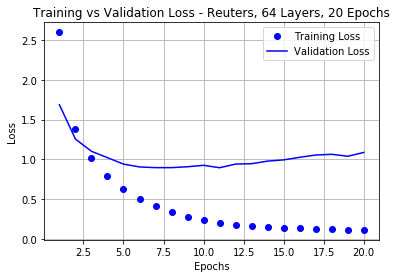

In [48]:
# Plotting loss
plt.figure(); plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b-', label='Validation Loss')
plt.xlabel('Epochs'); plt.ylabel('Loss'); plt.grid(True); plt.legend()
plt.title('Training vs Validation Loss - Reuters, 64 Layers, 20 Epochs')
plt.show()

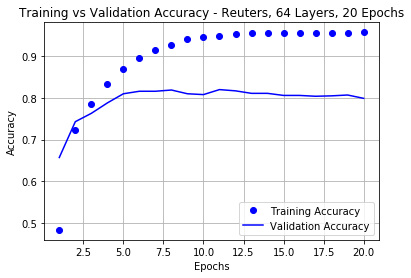

In [49]:
# Plotting accuracy
plt.figure(); plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b-', label='Validation Accuracy')
plt.xlabel('Epochs'); plt.ylabel('Accuracy'); plt.grid(True); plt.legend()
plt.title('Training vs Validation Accuracy - Reuters, 64 Layers, 20 Epochs')
plt.show()

It is clear from the visualizations for both loss and accuracy that the network begins to overfit after 9 epochs. The training acccuracy approaches 1 but the validation accuracy plateaus around 0.8, and actually seems to decrease as we approach 20 epochs.

### Retraining a model with fewer epochs

In [56]:
# Instantiate
newModel = models.Sequential()

# Add Layers
newModel.add(layers.Dense(units=64, input_shape=(10000,), activation='relu'))
newModel.add(layers.Dense(units=64, activation='relu'))
newModel.add(layers.Dense(units=46, activation='softmax'))

# Compile
newModel.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [57]:
# Train with fewer epochs but the same validation data, training data, and batch size
newModelHistory = newModel.fit(partial_x_train,
                              partial_y_train,
                              epochs=9,
                              batch_size=512,
                              validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 251us/sample - loss: 2.6528 - acc: 0.5452 - val_loss: 1.7446 - val_acc: 0.6450
Epoch 2/9
7982/7982 [==============================] - 2s 214us/sample - loss: 1.4230 - acc: 0.7072 - val_loss: 1.3196 - val_acc: 0.7190
Epoch 3/9
7982/7982 [==============================] - 2s 217us/sample - loss: 1.0492 - acc: 0.7783 - val_loss: 1.1358 - val_acc: 0.7570
Epoch 4/9
7982/7982 [==============================] - 2s 233us/sample - loss: 0.8266 - acc: 0.8242 - val_loss: 1.0492 - val_acc: 0.7740
Epoch 5/9
7982/7982 [==============================] - 2s 242us/sample - loss: 0.6576 - acc: 0.8614 - val_loss: 0.9709 - val_acc: 0.7930
Epoch 6/9
7982/7982 [==============================] - 2s 234us/sample - loss: 0.5258 - acc: 0.8906 - val_loss: 0.9295 - val_acc: 0.8090
Epoch 7/9
7982/7982 [==============================] - 2s 235us/sample - loss: 0.4288 - acc: 0.9099 - val_loss: 0.9039 - val_acc: 

In [53]:
# Getting data for plotting
loss = newModelHistory.history['loss']
acc = newModelHistory.history['acc']
val_loss = newModelHistory.history['val_loss']
val_acc = newModelHistory.history['val_acc']
epochs = range(1, len(loss) + 1)

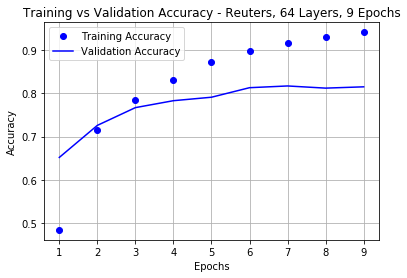

In [54]:
# Plotting accuracy
plt.figure(); plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b-', label='Validation Accuracy')
plt.xlabel('Epochs'); plt.ylabel('Accuracy'); plt.grid(True); plt.legend()
plt.title('Training vs Validation Accuracy - Reuters, 64 Layers, 9 Epochs')
plt.show()

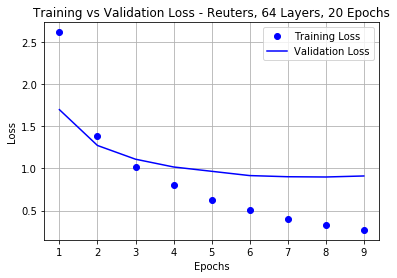

In [55]:
# Plotting loss
plt.figure(); plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b-', label='Validation Loss')
plt.xlabel('Epochs'); plt.ylabel('Loss'); plt.grid(True); plt.legend()
plt.title('Training vs Validation Loss - Reuters, 64 Layers, 20 Epochs')
plt.show()

### Predictions
Using the model trained on 9 epochs, we will make predictions on our test set.

`evaluate` outputs loss of our model on the data we pass to it, along with any other metrics we passed to it during training.

`predict` outputs the actual predicted labels for each example in the training data. Its output is not loss or accuracy, but can be used to compute them.

In [58]:
results = newModel.evaluate(x_test, y_test)

2246/2246 [==============================] - 1s 241us/sample - loss: 0.9817 - acc: 0.7898


In [59]:
predictedLabels = newModel.predict(x_test)

In [60]:
# Each entry in `prediction` is a vector of length 46
predictedLabels[0].shape

(46,)

In [62]:
# The coefficients in this vector sum to 1
np.sum(predictedLabels[0])

1.0

In [63]:
# So the prediction for each test sample is a vector of probabilities
# Each probability is the likelihood that the tested sample belongs 
# to the class that is encoded by that index in the column
predictedLabels[0]

array([1.64473640e-05, 5.44650720e-05, 1.20499381e-05, 3.73581409e-01,
       6.07339442e-01, 5.52514075e-06, 4.64815617e-04, 3.10689938e-04,
       4.22702497e-03, 9.07234935e-05, 1.30911227e-04, 8.23856215e-04,
       5.08871279e-04, 2.30953190e-03, 2.62937334e-04, 2.31836202e-05,
       2.18367204e-03, 3.65759042e-04, 5.23891395e-05, 1.60107028e-03,
       5.73530735e-04, 1.09260734e-04, 3.88460721e-05, 5.51154721e-04,
       6.93874608e-05, 4.34501650e-04, 1.09809625e-05, 1.32304252e-04,
       4.01268946e-04, 3.58188612e-04, 7.59546820e-04, 8.53230449e-05,
       4.04742714e-05, 2.46738473e-05, 1.06882500e-04, 5.97205399e-05,
       3.87617212e-04, 1.70206695e-04, 1.90127976e-05, 2.19907233e-04,
       1.35102919e-05, 1.02575647e-03, 1.80340139e-05, 2.41703083e-06,
       1.75528658e-05, 5.22593746e-06], dtype=float32)

In [64]:
np.argmax(predictedLabels[0])

4

In [65]:
# The maximum probability is at index 4, so it means that the current
# tested belongs to the topic class encoded by 4

## Information Bottleneck - Fewer Hidden Units

In [68]:
bnModel = models.Sequential()
bnModel.add(layers.Dense(units=64, activation='relu', input_shape=(10000,)))
bnModel.add(layers.Dense(units=4, activation='relu'))
bnModel.add(layers.Dense(units=46, activation='softmax'))

In [69]:
bnModel.compile(optimizer='rmsprop',
               loss='categorical_crossentropy', 
               metrics=['accuracy'])

In [70]:
bnModel.fit(partial_x_train, 
           partial_y_train,
           epochs=20, 
           batch_size=128, 
           validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 373us/sample - loss: 2.5956 - acc: 0.3586 - val_loss: 1.9926 - val_acc: 0.3750
Epoch 2/20
7982/7982 [==============================] - 3s 316us/sample - loss: 1.7772 - acc: 0.5355 - val_loss: 1.6244 - val_acc: 0.5830
Epoch 3/20
7982/7982 [==============================] - 3s 338us/sample - loss: 1.5034 - acc: 0.6041 - val_loss: 1.5183 - val_acc: 0.6040
Epoch 4/20
7982/7982 [==============================] - 3s 320us/sample - loss: 1.3512 - acc: 0.6654 - val_loss: 1.4477 - val_acc: 0.6500
Epoch 5/20
7982/7982 [==============================] - 3s 314us/sample - loss: 1.2411 - acc: 0.6842 - val_loss: 1.4553 - val_acc: 0.6570
Epoch 6/20
7982/7982 [==============================] - 3s 320us/sample - loss: 1.1536 - acc: 0.6883 - val_loss: 1.3788 - val_acc: 0.6670
Epoch 7/20
7982/7982 [==============================] - 3s 320us/sample - loss: 1.0828 - acc: 0.6926 - val_loss: 1.3890 - va

With an information bottleneck, the validation accuracy peaks at 70.6%, which is approximately an 8% drop from the validation accuracy observed without the information bottleneck.

This means the we're trying to compress a lot of information - enough to recover the separation hyperplanes of 46 classes - into an intermediate space that is too low-dimensional. 